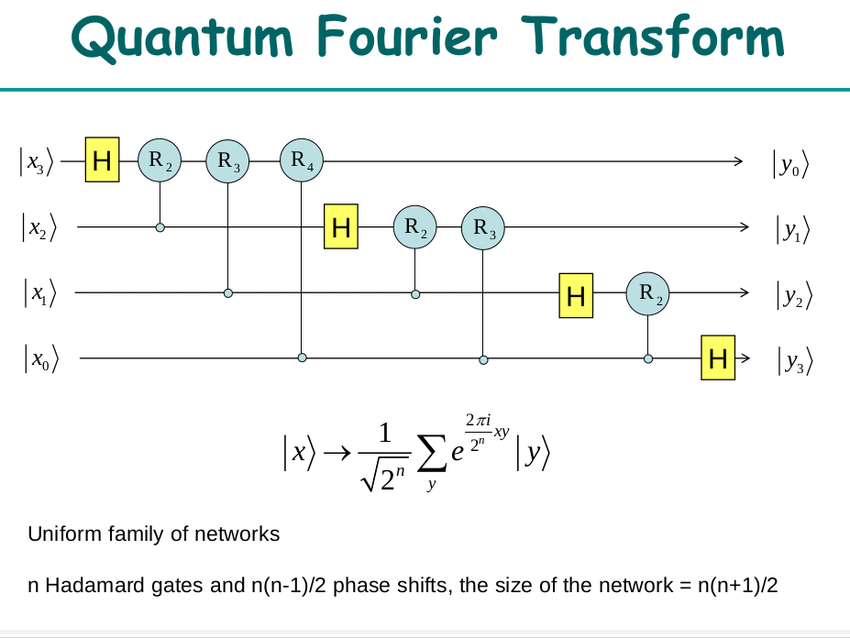

In [1]:
"""Create and simulate a circuit for Quantum Fourier Transform on a 4-qubit system"""

# Imports
import numpy as np
import cirq

In [11]:
def main():
    """Calls circuit generation function and runs it on a simulator."""
    # Create circuit and display it
    qft_circuit = generate_2x2_grid_qft_circuit()
    print('Circuit:')
    print(qft_circuit)
    
    # Simulate and collect final state
    simulator = cirq.Simulator()
    result = simulator.simulate(qft_circuit)
    
    # Display the final state
    print('\nFinalState')
    print(np.around(result.final_state, 3))

In [12]:
def cz_and_swap(q0, q1, rot):
    """Helper function that yields controlled RZ-gate and SWAP gate on the input qubits"""
    yield cirq.CZ(q0, q1)**rot
    yield cirq.SWAP(q0, q1)
    

The next helper function is used to write the entire circuit. 

Firstly, defined 2x2 grid of qubits and label them $a$ through $d$. In many QC systems, thre are contraints on qubit interactions (e.g. only nearest-neighbour qubits can interact) - which would not be suitable for standard QFT circuit shown above.

Instead, we need a modified QFT circuit including SWAP operations need to be applied (pic impending)

We apply a series of Hadamard and control otiation operators as specified in the diagram. In this example, we apply QFT on (1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0) which is ground state |0000>

In [19]:
def generate_2x2_grid_qft_circuit():
    """Returns QFT circuit on 2x2 planar qubit architecture"""
    # Define a 2*2 square grid of qubits
    a, b, c, d = [cirq.GridQubit(0,0), cirq.GridQubit(0,1), cirq.GridQubit(1,1), cirq.GridQubit(1,0)]
    
    # Create the circuit
    circuit = cirq.Circuit(
        cirq.H(a),
        cz_and_swap(a, b, 0.5),
        cz_and_swap(b, c, 0.25),
        cz_and_swap(c, d, 0.125),
        cirq.H(a),
        cz_and_swap(a, b, 0.5),
        cz_and_swap(c, d, 0.25),
        cirq.H(a),
        cz_and_swap(a, b, 0.5),
        cirq.H(a),
        strategy=cirq.InsertStrategy.EARLIEST
    )
    
    return circuit

In [20]:
if __name__ == '__main__':
    main()

Circuit:
(0, 0): ───H───@───────×───H────────────@─────────×───H────────@───────×───H───
               │       │                │         │            │       │
(0, 1): ───────@^0.5───×───@────────×───@^0.5─────×────────────@^0.5───×───────
                           │        │
(1, 0): ───────────────────┼────────┼───@─────────×───@────────×───────────────
                           │        │   │         │   │        │
(1, 1): ───────────────────@^0.25───×───@^(1/8)───×───@^0.25───×───────────────

FinalState
[ 0.5 +0.j    0.5 +0.j    0.  +0.j    0.  +0.j    0.25+0.25j  0.25+0.25j
  0.  +0.j    0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j   -0.  +0.j
  0.25-0.25j  0.25-0.25j -0.  +0.j   -0.  +0.j  ]


<ipython-input-11-6f0e6a83b13d>:14: DeprecationWarning: StateVectorTrialResult.final_state was used but is deprecated.
It will be removed in cirq v0.10.0.
Use final_state_vector instead.

  print(np.around(result.final_state, 3))
